In [55]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [56]:
## Ecuaciones diferenciales

k = 5
l = 3 
m = 2
g = 9.8
r0 = 15
theta0 = np.pi/8
rprima = 0
thetaprima = 0


def getA(rvec, vvec, t, beta = 0):
    r = rvec[0]
    theta = rvec[1]
    
    dr = vvec[0]
    dtheta = vvec[1]
    
    a1 = k/m*(l-r)+ g*np.cos(theta) + r*dtheta**2
    a2 = -g/r *np.sin(theta)- 2/r*dr*dtheta
    
    a = np.array([a1,a2])
    return a




In [80]:
def Beeman(t0, tf, r0, h, N, beta = 0):
    t = np.linspace(t0, tf, N+1)
    
    #inicializa
    r = np.zeros([N+1,2])
    v = np.zeros([N+1,2])
    a = np.zeros([N+1,2])
    
    #Condiciones Iniciales
    r[0,0] = r0[0]
    r[0,1] = r0[1]
    
    v[0,0] = r0[2]
    v[0,1] = r0[3]
    
    #Se calculan las aceleraciones en 0, teniendo en cuenta que con las condicuones iniciales s
    #se calculan las aceleraciones iniciales
    a0 = getA(r[0], v[0], t)
    a[0,0] = a0[0]
    a[0,1] = a0[1]
    

    
    #Teniendo en cuenta que v1 = v0 + a0*h y x1 = x0 + v0*h
    #Predecimos el primer punto usando Euler
    v[1,0] = a[0,0]*h + v[0,0] 
    v[1,1] = a[0,1]*h + v[0,1]
    
    r[1,0] = r[0,0] + v[0,0]*h
    r[1,1] = r[0,1] + v[0,1]*h
    
    a1 = getA(r[1], v[1], t) 
    a[1,0] = a1[0]
    a[1,1] = a1[1]
    
    
     #Predictor
    for i in range(1, N):
        r[i+1] = r[i] + h*v[i] + 1/6*(4*a[i] - a[i-1])*h**2
        v[i+1] = v[i] + 1/2*(3*a[i] - a[i-1])*h
        a[i+1] = getA(r[i+1], v[i+1], t[i+1], beta)
    
    #Corrector
    for i in range(1,N):
        v[i+1] = v[i] + 1/12*(5*a[i+1] + 8*a[i] - a[i-1])*h
    
    return r,v,t

In [81]:
CondIni = [r0, theta0, rprima, thetaprima]
t0, tf, h, N  = 0, 30, 0.015, 2000
rvec,vec, tvec = Beeman(t0, tf,CondIni, h, N, beta = 0)

In [89]:
#Reducimos la magnitud, en un factor de 20
r = []
theta = []
for i in range(len(rvec)):
    r.append(rvec[i,0])
    theta.append(rvec[i,1])
    
    
x = []
y = []
for i in range(len(theta)):
    x.append(r[i]*(np.cos(theta[i]-np.pi/2)))
    y.append(r[i]*(np.sin(theta[i]-np.pi/2)))
    
r0_ = np.array([ 15*np.cos(np.pi/8), 15*np.sin(np.pi/8) ])
v0_ = np.array([ 0, 0])

#Reducimos
xr, yr = [], []
rr, thetar = [], []
tt = []
for i in range(len(x)):
    if(i % 30 == 0):
        xr+= [x[i]]
        yr +=[y[i]]
        rr+= [r[i]]
        thetar +=[theta[i]]
        tt += [tvec[i]]


<IPython.core.display.Javascript object>


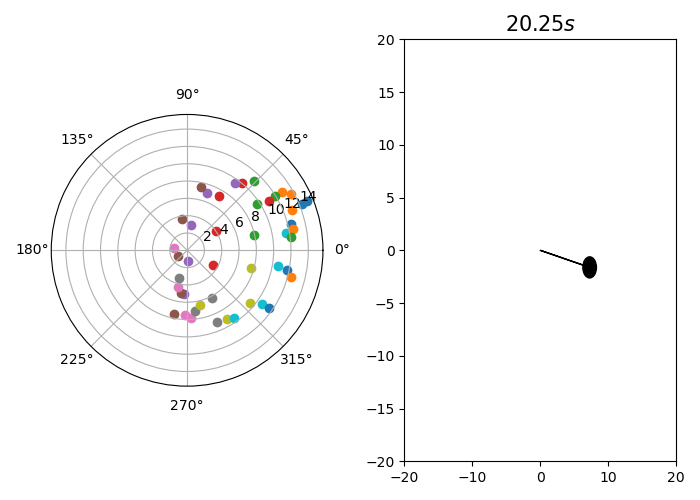

In [90]:
#Solución Inciso 1 parte 2 (Animación y Respuestas)

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,2,1, projection='polar')
ax2 = fig.add_subplot(1,2,2,)

def init():
    ax2.set_xlim(-20,20)
    ax2.set_ylim(-20,20)
    plt.tight_layout()

def Update(i):
    
    plot = ax2.clear()
    init()
    plot = ax2.set_title(r'${:.2f} s$'.format(tt[i]), fontsize=15)
    
    ax2.set_xlim(-20,20)
    ax2.set_ylim(-20,20)
    plt.tight_layout()
    
    t = tt[i]    
    x = xr[i]
    y = yr[i]
    r = rr[i]
    theta = thetar[i]
    
    bola = plt.Circle( (x,y), 1 , color='k', fill=True)

    plot = ax1.scatter(theta,r)
    plot =  ax2.add_patch(bola)
    plot = ax2.arrow( 0., 0., x, y, head_width=0.05 )

    plt.tight_layout()
        

    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(tt),init_func=init)



In [88]:
x

[-13.858192987669302,
 -13.858192987669302,
 -13.852146094232953,
 -13.842069967814396,
 -13.82797079160244,
 -13.80985662322939,
 -13.787737815086398,
 -13.761627008735342,
 -13.731539127992656,
 -13.697491370764842,
 -13.659503199640612,
 -13.617596331245222,
 -13.571794724363297,
 -13.522124566837268,
 -13.46861426124909,
 -13.411294409393781,
 -13.350197795553925,
 -13.28535936858499,
 -13.216816222822006,
 -13.144607577818796,
 -13.0687747569316,
 -12.989361164759579,
 -12.906412263455287,
 -12.819975547918787,
 -12.730100519889673,
 -12.636838660951787,
 -12.540243404465949,
 -12.440370106446464,
 -12.337276015397679,
 -12.231020241127144,
 -12.121663722552455,
 -12.009269194518936,
 -11.89390115364577,
 -11.775625823218142,
 -11.654511117143226,
 -11.530626602987667,
 -11.404043464114194,
 -11.27483446093471,
 -11.143073891296822,
 -11.008837550020232,
 -10.872202687598648,
 -10.733247968081923,
 -10.592053426151976,
 -10.448700423404429,
 -10.30327160384616,
 -10.15585084861670